# Загрузка Pandas и очистка данных

In [659]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.pyplot as plt

In [660]:
df = pd.read_csv('main_task.csv')

In [661]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

#### Для начала посмотрим на загруженный файл и пройдемся по каждому столбцу, проанализировав формат данных, содержание и.т.д:

In [662]:
df.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


#### Краткая справка по загруженному файлу:
    Загруженный файл содержит сведения о 40 000 ресторанах Европы.
Датасет состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

3 столбца из 10 имеют числовые значения, и 7 столбцов имеют текстовые значения. Более того пропуски имеются в столбцах 'Cuisine Style', 'Price Range', 'Number of Reviews'

In [664]:
df.columns = [x.lower() for x in df.columns]

#### Посмотрим на столбец 'id_ta' и проанализуем его содержание

In [665]:
df.id_ta.value_counts()

d13002276    2
d8753348     2
d3161682     2
d1315077     2
d11674463    2
            ..
d1122768     1
d8380566     1
d10894995    1
d3687467     1
d4556249     1
Name: id_ta, Length: 39980, dtype: int64

In [666]:
df[df['id_ta'] == 'd13002276']

,restaurant_id,city,cuisine style,ranking,rating,price range,number of reviews,reviews,url_ta,id_ta
1579,id_2673,Madrid,['American'],2675.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276
26696,id_2485,Madrid,['American'],2487.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276


Как мы видим, столбец содержит дубликаты, предлагается их удалить.

In [667]:
df.drop_duplicates(subset = ['id_ta'], inplace = True)

На первоначальной обработке массива удаление дубликатов позволило уменьшить MAE на 0.01

#### Посмотрим на столбец restaurant_id и проанализируем его содержимое

In [668]:
df.restaurant_id.value_counts()

id_871      18
id_633      18
id_227      18
id_436      18
id_430      17
            ..
id_14360     1
id_10685     1
id_8921      1
id_6139      1
id_15058     1
Name: restaurant_id, Length: 11907, dtype: int64

In [669]:
df[df['restaurant_id'] == 'id_227']

,restaurant_id,city,cuisine style,ranking,rating,price range,number of reviews,reviews,url_ta,id_ta
1065,id_227,Luxembourg,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",228.0,4.0,$$ - $$$,21.0,"[['Nice little Lebanese restaurant', 'Great fo...",/Restaurant_Review-g190356-d10275783-Reviews-K...,d10275783
4727,id_227,Bratislava,"['Healthy', 'European', 'Mediterranean', 'Vege...",228.0,4.0,$$ - $$$,122.0,"[['Great fish (African sharptooth catfish)', '...",/Restaurant_Review-g274924-d4009959-Reviews-Me...,d4009959
6237,id_227,Athens,"['European', 'Greek', 'Mediterranean']",228.0,4.5,$$ - $$$,220.0,"[['Spectacular view and food', 'Great view'], ...",/Restaurant_Review-g189400-d1898490-Reviews-Ol...,d1898490
7521,id_227,Warsaw,"['Polish', 'European', 'Central European', 'Ea...",228.0,4.0,$$ - $$$,95.0,"[['Great place', 'A lovely warm place and good...",/Restaurant_Review-g274856-d2410632-Reviews-Fe...,d2410632
9299,id_227,Amsterdam,"['Dutch', 'Bar', 'European', 'Gastropub', 'Caf...",228.0,4.5,$$ - $$$,201.0,"[['Historic jewel of a bar in Amsterdam', 'Gre...",/Restaurant_Review-g188590-d753101-Reviews-Pro...,d753101
12537,id_227,Madrid,"['Bar', 'Mediterranean', 'Spanish', 'Vegetaria...",228.0,4.0,$$ - $$$,1011.0,"[['Dinner', 'Old traditional Spanish restauran...",/Restaurant_Review-g187514-d697471-Reviews-Cas...,d697471
13876,id_227,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",228.0,4.5,$$ - $$$,1066.0,"[['Great start to Italian food journey', 'My F...",/Restaurant_Review-g187791-d1516161-Reviews-Go...,d1516161
14990,id_227,Dublin,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",228.0,4.5,$$ - $$$,119.0,"[['Fantastic with young people', 'Italian Scho...",/Restaurant_Review-g186605-d10516461-Reviews-P...,d10516461
17610,id_227,Ljubljana,"['Pizza', 'European', 'Slovenian']",228.0,3.5,$$ - $$$,78.0,"[['Good beer', 'OK if you choose correctly'], ...",/Restaurant_Review-g274873-d3292800-Reviews-Kr...,d3292800
20591,id_227,Helsinki,"['Asian', 'Vietnamese', 'Vegetarian Friendly',...",228.0,4.5,$,42.0,"[['Amazing and cheap Vietnamese veggie food', ...",/Restaurant_Review-g189934-d7130658-Reviews-Se...,d7130658


По всей видимости внутри каждого города ID ресторана может повторяться. Такие строки не являются дубликатами. 

Также можно сказать, что данный столбец не несет в себе никакой информации для дальнейшей модели, поэтому предлагается его удалить. Более того числовая часть столбца визуально линейно коррелирует со столбцом ranking. По всей видимости это связано с тем, что restaurant_id присваивается в соответствии с рейтингом ресторана внутри города. Предварительно проверим.

In [670]:
df['restaurant_id'] = df['restaurant_id'].apply(lambda x: float(x[3:]))

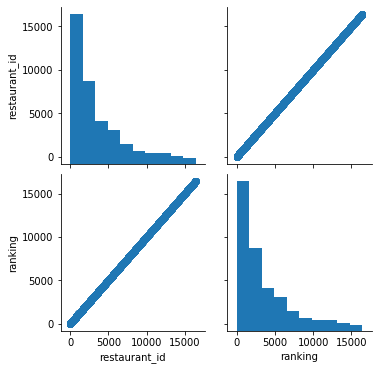

In [671]:
sns.pairplot(df, vars = ['restaurant_id', 'ranking'], kind='reg')

In [672]:
df.drop(['restaurant_id'], inplace = True, axis = 1)

#### Рассмотрим столбец 'price range' и проанализируем его

In [673]:
df['price range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [674]:
df['price range'].value_counts()

$$ - $$$    18402
$            6276
$$$$         1423
Name: price range, dtype: int64

Как видно, столбец содержит информацию о ценовой категории ресторана. Всего имеется 3 категории + имеются пропуски. Предлагается заменить значения данного категорального признака числовыми: 1, 2 и 3 (от дешевого до дорогого)

Пустые значения предлагается заполнить средними значениями в рамках каждого города

In [675]:
df['price range'].replace('$', 1, inplace = True)
df['price range'].replace('$$ - $$$', 2, inplace = True)
df['price range'].replace('$$$$', 3, inplace = True)

In [676]:
round(df.groupby('city')['price range'].mean(),0)

city
Amsterdam     2.0
Athens        2.0
Barcelona     2.0
Berlin        2.0
Bratislava    2.0
Brussels      2.0
Budapest      2.0
Copenhagen    2.0
Dublin        2.0
Edinburgh     2.0
Geneva        2.0
Hamburg       2.0
Helsinki      2.0
Krakow        2.0
Lisbon        2.0
Ljubljana     2.0
London        2.0
Luxembourg    2.0
Lyon          2.0
Madrid        2.0
Milan         2.0
Munich        2.0
Oporto        2.0
Oslo          2.0
Paris         2.0
Prague        2.0
Rome          2.0
Stockholm     2.0
Vienna        2.0
Warsaw        2.0
Zurich        2.0
Name: price range, dtype: float64

In [677]:
df['price range'].fillna(2, inplace = True)

#### Рассмотрим столбец 'number of reviews' и проанализируем его

In [678]:
df['number of reviews'].isna().sum()

2543

Столбец содержит 2543 пропуска, в целом это не очень много на данном объеме данных (около 6%). Перед тем как выбрать способ заполнения пустых ячеек, посмотрим на наличие выбросов.

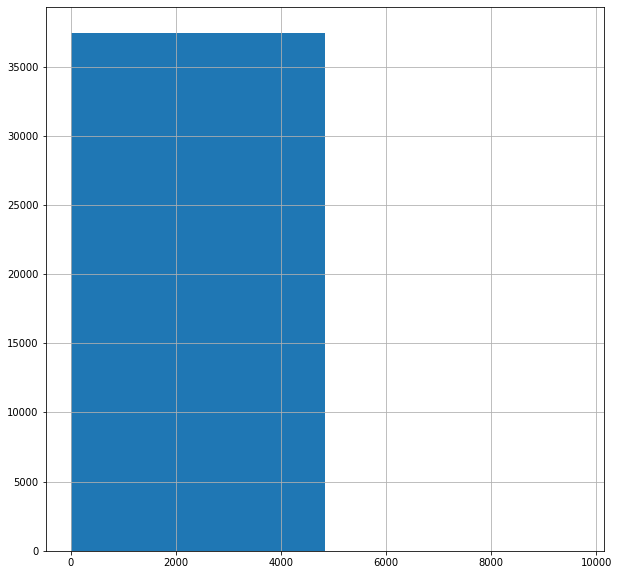

In [679]:
df['number of reviews'].hist(bins = 2)

In [682]:
q = df['number of reviews'].quantile(0.99975)
q

5635.214000002132

поскольку определение выбросов методом межквартильного размаха (1,5IQR) отсекает очень большое количество данных,
то будем считать, что выбросами будут значения не входящие в 99,9% выборки. Отсеим их.

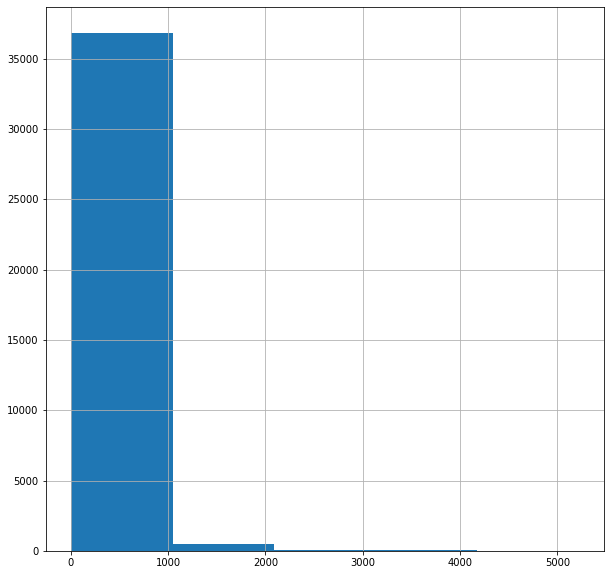

In [683]:
df = df.loc[df['number of reviews'] < q]
df['number of reviews'].hist(bins = 5)

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               37427 non-null  object 
 1   cuisine style      29505 non-null  object 
 2   ranking            37427 non-null  float64
 3   rating             37427 non-null  float64
 4   price range        37427 non-null  float64
 5   number of reviews  37427 non-null  float64
 6   reviews            37427 non-null  object 
 7   url_ta             37427 non-null  object 
 8   id_ta              37427 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.9+ MB


In [685]:
df['number of reviews'].fillna(df['number of reviews'].mean(), inplace = True)

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Обработаем информацию представленную в столбце city

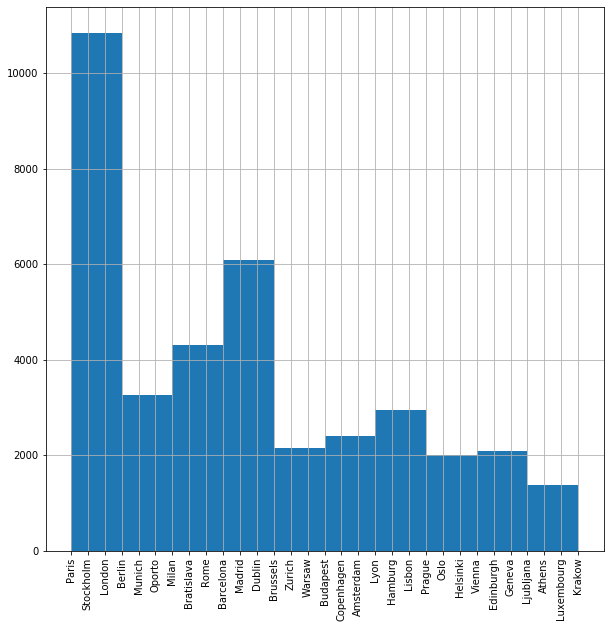

In [686]:
df.city.hist(xrot = 90)

Столбец содержит информацию о городе нахождения того или иного ресторана. пропуски в столбце отсутствуют. Поработаем с данным столбцом следующим образом:
 - закодируем столбцы числовыми данными
 - вычленим столицы и закодируем значения
 - вычленим страны и закодируем значения
 - создадим dummi переменные
 

In [687]:
df['city_code'] = df['city']
le = LabelEncoder()
le.fit(df['city_code'])
df['city_code'] = le.transform(df['city_code'])

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [688]:
dict_Сountries = {'London' : 'England', 'Paris' : 'France', 'Madrid' : 'Spain', 
                  'Barcelona' : 'Spain', 'Berlin' : 'Germany', 'Milan' : 'Italy', 
                  'Rome' : 'Italy', 'Prague' : 'Czech_c', 'Lisbon' : 'Portugal', 
                  'Vienna' : 'Austria', 'Amsterdam' : 'Holland', 
                  'Brussels' : 'Belgium', 'Hamburg' : 'Germany', 'Munich' : 'Germany', 
                  'Lyon' : 'France', 'Stockholm' : 'Sweden', 'Budapest' : 'Romania', 
                  'Warsaw' : 'Poland', 'Dublin' : 'Ireland', 'Copenhagen' : 'Denmark', 
                  'Athens' : 'Greece', 'Edinburgh' : 'Scotland', 'Zurich' : 'Switzerland', 
                  'Oporto' : 'Portugal', 'Geneva' : 'Switzerland', 'Krakow' : 'Poland', 
                  'Oslo' : 'Norway', 'Helsinki' : 'Finland', 'Bratislava' : 'Slovakia', 
                  'Luxembourg' : 'Luxembourg_c', 'Ljubljana' : 'Slovenia'}
df['country'] = df.apply(lambda row: dict_Сountries[row['city']], axis = 1)

le = LabelEncoder()
le.fit(df['country'])
df['code_country'] = le.transform(df['country'])

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [689]:
list_Of_NotCapitalCity = ['Barcelona', 'Milan', 'Hamburg', 'Munich', 
                          'Lyon', 'Zurich', 'Oporto', 'Geneva', 'Krakow']
df['capital_city'] = df['city'].apply(lambda x: 0.0 if x in list_Of_NotCapitalCity else 1.0)

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [690]:
df_dummies_city = pd.get_dummies(df.city)
df = pd.merge(df, df_dummies_city, left_index=True, right_index=True)

Столбец city можно удалить, также можем поступить и со столбцом country

In [691]:
df.drop(['city'], inplace = True, axis = 1)
df.drop(['country'], inplace = True, axis = 1)
df.drop(['id_ta'], inplace = True, axis = 1)
df.drop(['url_ta'], inplace = True, axis = 1)

#### Проведем анализ столбца cuisine style

In [692]:
df['cuisine style'].isna().sum()

7922

В столбце содержится информация о кухнях представленных в ресторане. при этом в одном ресторане может быть представлено более одно кухни. Столбец содержит 7922 пропусков. Проведем со столбцом следующие операции:
- заполним пустые ячейки значением other
- обработаем столбец и сгенерим dummi переменные
- введем новый признак в виде количества кухонь представленных в ресторане

In [693]:
df['cuisine style'] = df['cuisine style'].fillna("['other']")

In [694]:
from yaml import safe_load 
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

tmp = df["cuisine style"].dropna().apply(safe_load).dropna()

X = pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(tmp), 
        columns=mlb.classes_, 
        index=tmp.index)

df = df.join(X, how="left")

In [695]:
df["amount of cuisines"] = df.iloc[:,40:].sum(axis=1)

Столбец cuisine style можем теперь удалить

In [696]:
df.drop(['cuisine style'], inplace = True, axis = 1)

#### Проведем анализ столбца ranking

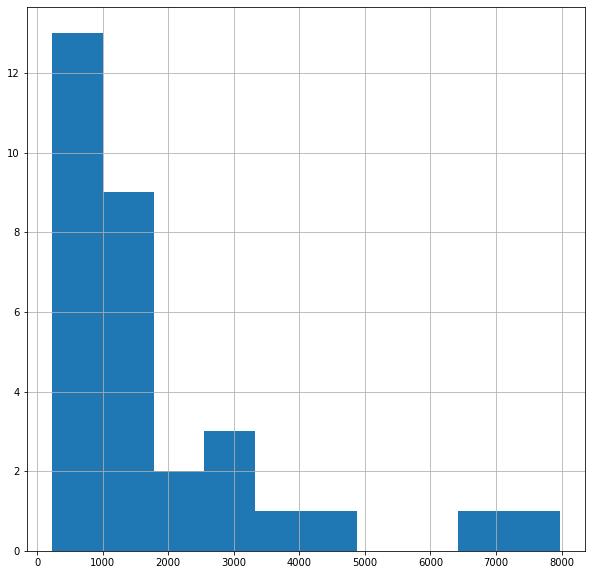

In [697]:
df.groupby('city_code')['ranking'].mean().hist()

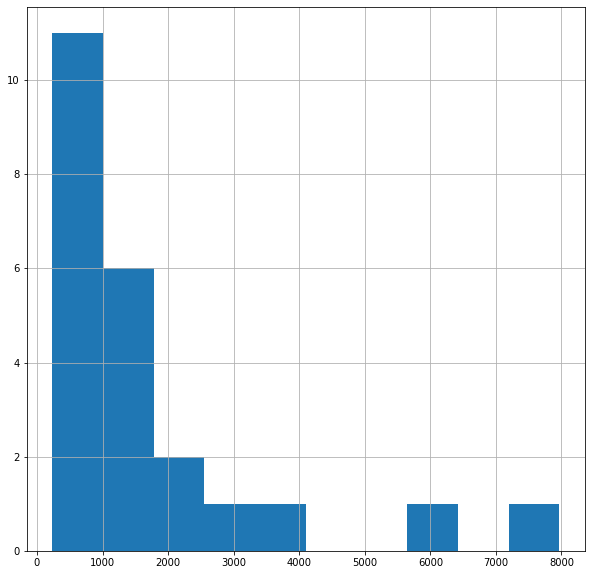

In [698]:
df.groupby('code_country')['ranking'].mean().hist()

предлагается провести с данным столбцом провести MinMax нормализацию

In [699]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.ranking = scaler.fit_transform(df.ranking.values.reshape(-1, 1))

#### Поработаем с данными в столбце reviews

In [700]:
df.reviews.isna().sum()

0

In [701]:
df.reviews.value_counts()

[[], []]                                                                                                                         4868
[['Best brunch ever!!', 'Adorable fashion shop with a mini kitchen...'], ['05/21/2016', '11/18/2014']]                              1
[['Best cafe to chill out', 'Crayfish Party'], ['12/27/2017', '09/25/2017']]                                                        1
[['Great restaurant with a nice atmosphere, g...', 'surprisingly good food near Divoka Sarka'], ['08/28/2016', '05/31/2016']]       1
[['A pleasant surprise', 'Trendy'], ['12/04/2017', '12/01/2017']]                                                                   1
                                                                                                                                 ... 
[['Awesome local dive bar in the heart of Tra...', 'Cool bar - cheap prices'], ['12/06/2017', '12/06/2017']]                        1
[['First taste of Curry Wurst'], ['07/10/2016']]              

В данном столбце нет пустых значений, но есть значения, которые не несут в себе никакой информации('[[], []]') и их достаточно много.
Поработаем над информацией в столбце. Видно, что в ячейках присутствуют как сами отзывы, так и даты. Первым делом предлагается поработать с датам и вычленить их с помощью регулярных выражений.

In [702]:
df['date_of_Review'] = df['reviews'].str.findall('\d+/\d+/\d+')
df['review_amount'] = df['date_of_Review'].apply(lambda x: len(x))

Как видно в столбце может содержаться от одной даты до 3-х, видимо 3 даты содержится в тех случаях, когда пользователи в теле отзыва указывали дату (Например: 06/07/19 посетили ресторан...). Исходя из имеющейся информации запишем в отдельный столбец информацию о количестве дней с даты последнего отзыва и количество дней между двумя отзывами, если такая информация имеется.

In [703]:
def time_to_now(row):
    if row['date_of_Review'] == []:
        return None
    return datetime.datetime.now() - pd.to_datetime(row['date_of_Review']).max()

def time_between_Reviews(row):
    if row['date_of_Review'] == []:
        return None
    return pd.to_datetime(row['date_of_Review']).max() - pd.to_datetime(row['date_of_Review']).min()

In [704]:
df['day_to_now'] = df.apply(time_to_now, axis = 1).dt.days
df['day_to_now'].fillna(0, inplace = True)

In [705]:
df['day_between_Reviews'] = df[df['review_amount'] == 2].apply(time_between_Reviews, axis = 1).dt.days
df['day_between_Reviews'].fillna(0, inplace = True)

удалим ненужные столбцы

In [706]:
df.drop(['reviews'], inplace = True, axis = 1)
df.drop(['date_of_Review'], inplace = True, axis = 1)
df.drop(['review_amount'], inplace = True, axis = 1)

Проведем нормализацию столбцов day_to_now(время в днях с последнего отзыва), day_between_Reviews (время между отзывами, number of reviews (количество отзывов)

In [707]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.day_to_now = scaler.fit_transform(df.day_to_now.values.reshape(-1, 1))

In [708]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['day_between_Reviews'] = scaler.fit_transform(df['day_between_Reviews'].values.reshape(-1, 1))

In [709]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['number of reviews'] = scaler.fit_transform(df['number of reviews'].values.reshape(-1, 1))

построим матрицу корреляций для полученного датасета, который является входным для модели предсказания. Убедимся, что коррелирующие признаки отсутствуют

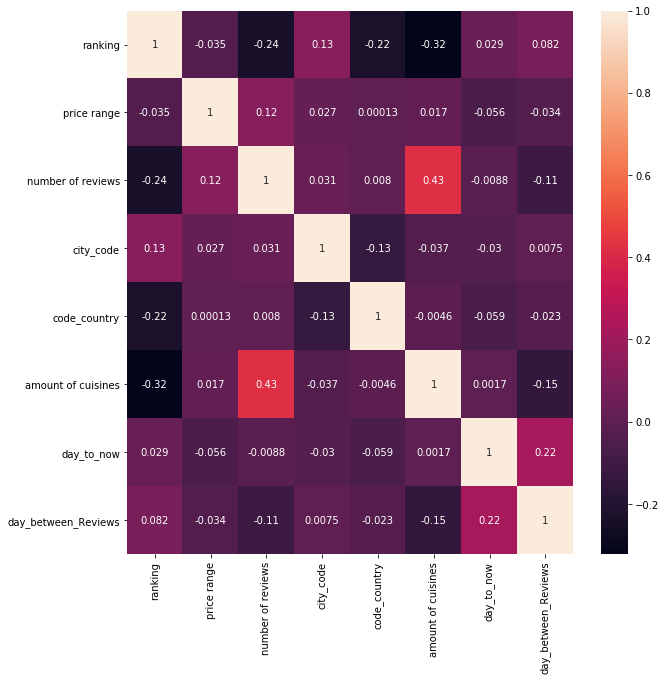

In [710]:
ax = sns.heatmap(df[['ranking', 
    'price range', 
    'number of reviews', 
    'city_code', 
    'code_country', 
    'amount of cuisines', 'day_to_now', 'day_between_Reviews']].corr(), annot=True, fmt='.2g')

Из матрицы корреляций интересно отметить, что чем больше представлено в ресторане видов кухонь, тем больше отзывов получает такой ресторан

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [711]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating','capital_city'], axis = 1)
y = df['rating']

In [712]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [713]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [714]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [715]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [716]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21520626269103343


### Выведем основные параметры входных данных и их степень влияния на точность модели

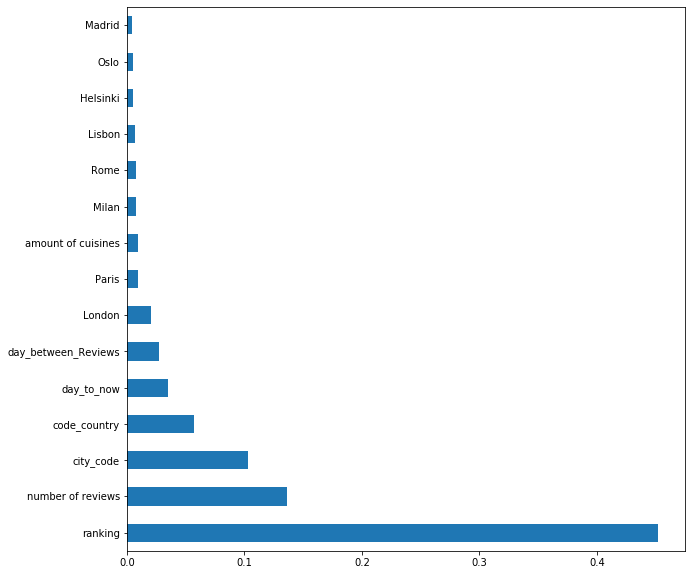

In [717]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')